# 本作业申请评优

# 案例1
### 题目描述：
试根据给出的数据，得出冰淇淋销量与温度之间的关系。  
  
  
$$\begin{array}{|c|c|c|c|}\hline {温度(摄氏度)}&{27}&{29}&{31}&{33}\\ \hline {销量(根)}&{110}&{130}&{148}&{152}\\ \hline \end{array}$$  
  
### 案例解答：
设二次拟合多项式为$$p_{2}\left(x\right)=a_{0}+a_{1}x+a_{2}x^{2}$$
将数据带入拟合方程可以得到
$$\begin{bmatrix}
 4 & 120 & 3620\\
 120 & 3620 & 109800\\
 3620 & 109800 & 3348164
\end{bmatrix}
\begin{bmatrix}
 a_{0}\\
 a_{1}\\
 a_{2}
\end{bmatrix}
=
\begin{bmatrix}
540\\
16344\\
497276
\end{bmatrix}
$$
对矩阵$\begin{bmatrix}
 4 & 120 & 3620\\
 120 & 3620 & 109800\\
 3620 & 109800 & 3348164
\end{bmatrix}$做LU分解得到
$$\begin{bmatrix}
 4 & 120 & 3620\\
 120 & 3620 & 109800\\
 3620 & 109800 & 3348164
\end{bmatrix}
=
\begin{bmatrix}
 1 & 0 & 0\\
 30 & 1 & 0\\
 905 & 60 & 1
\end{bmatrix}
\begin{bmatrix}
 4 & 120 & 3620\\
 0 & 20 & 1200\\
 0 & 0 & 64
\end{bmatrix}$$
进行两次回带后可以得到
$$\begin{bmatrix}
 a_{0}\\
 a_{1}\\
 a_{2}
\end{bmatrix}=
\begin{bmatrix}
-976\\
67.2\\
-1
\end{bmatrix}$$
则$$p_{2}\left(x\right)=-976+67.2x-x^{2}$$
此外，也可以采用高斯·赛德尔迭代法来求解线性方程组
### 代码：

In [37]:
import numpy as np
from numpy.linalg import inv,norm
import matplotlib.pyplot as plt
def gauss_seidel(A,b,tol,K):
    D=np.diag(np.diag(A))
    U=(np.triu(A)-D)
    L=(np.tril(A)-D)
    err=1
    step=0
    x_old=np.zeros((len(b),1))
    x=np.zeros((len(b),1))
    while err>tol and step<K:
        x=np.dot(inv(inv(D).dot(L)+np.identity(len(b))),inv(D).dot(b-U.dot(x_old)))
        err=norm(b-A.dot(x),2)/norm(b,2)
        x_old=x
        step+=1
    return x
K=int(input("请输入最大迭代步数K: "))
tol=float(input("请输入控制精度: "))
b=np.array([[540],[16344],[497276]])
A=np.array([[4,120,3620],[120,3620,109800],[3620,109800,3348164]])
print("解方程AX=b得X=")
print(gauss_seidel(A,b,tol,K))

请输入最大迭代步数K: 10000
请输入控制精度: 0.000001
解方程AX=b得X=
[[-9.28046238]
 [ 2.53479036]
 [ 0.07542979]]


### 知识点：
第二章：LU分解解线性方程组  
第四章：最小二乘拟合  
第六章：高斯·赛德尔迭代法
 
### 思政感悟：
LU分解解线性方程组的计算工作量为三角分解加两次回代，计算量为$\frac{4}{3}n^{2}$，比高斯消去过程的计算工作量小，具有明显的优势，且使用矩阵进行表达，式子更为简洁清晰。相比三次样条插值，曲线拟合的最小二乘方法在具备着解决龙格现象的优点之外，还大量地减小了计算量，在实际应用中非常常见。采用迭代法来解问题更适合用于大规模稀疏线性方程组，在小矩阵中计算结果不准确。
### 案例来源：
原创

# 案例2
### 题目描述：
某居民区有一供居民用水的圆柱形水塔，一般可以通过测量其水位来估计水的流量。试估计一天的总用水量。
$\begin{array}{|c|c|c|c|}\hline {时刻(h)}&{1}&{2}&{3}&{4}&{5}&{6}&{7}&{8}&{9}&{10}&{11}&{12}&{13}&{14}&{15}&{16}&{17}&{18}&{19}&{20}&{21}&{22}&{23}&{24}\\ \hline {流速(m³/h)}&{53}&{45}&{28}&{36}&{35}&{63}&{33}&{32.5}&{48}&{33}&{40}&{72.5}&{60}&{62.4}&{55}&{61}&{59}&{45}&{67}&{38}&{29}&{46}&{58}&{34}\\ \hline \end{array}$
### 案例解答：
可以通过三次样条插值来获得水的流量的函数表达式，再通过复合辛普森积分公式来得到一天的总用水量。
### 代码：

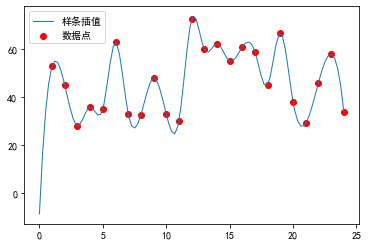

一天总用水量为1116.0744649667665m³


In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
from scipy.interpolate import CubicSpline
from scipy.integrate import simps

Xi=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
Yi=np.array([53,45,28,36,35,63,33,32.5,48,33,30,72.5,60,62.4,55,61,59,45,67,38,29,46,58,34])
scyt=CubicSpline(Xi,Yi,bc_type='not-a-knot')
plt.figure()
x=np.linspace(0,24,100)
plt.plot(x,scyt(x),label="样条插值",linewidth=1)
plt.scatter(Xi,Yi,label="数据点",color="r")
plt.legend()
plt.show()
t=np.linspace(0,24,121)
I=simps(scyt(t),t)
print("一天总用水量为{}m³".format(I))

### 知识点：
第三章：三次样条插值  
第五章：数值积分
 
### 思政感悟：
三次样条插值公式简单、运算量节省、稳定性好，满足了所需要的精度，还令插值函数具有一定的光滑性，改善了分段低次插值在节点处导数值不连续、插值多项式不光滑的缺点。而复合辛普森积分公式实质上是被积函数的分段埃尔米特插值的积分，让我们在不知道被积函数具体形式时，只根据已有数据就可计算积分。
### 案例来源：
https://max.book118.com/html/2016/0727/49392315.shtm#:~:text=%E6%B0%B4%E5%A1%94%E6%B0%B4%E6%B5%81%E9%87%8F%E7%9A%84%E4%BC%B0%E8%AE%A1%20%E4%B8%80%EF%BC%8E%E5%AE%9E%E9%AA%8C%E9%97%AE%E9%A2%98,%E6%9F%90%E5%B1%85%E6%B0%91%E5%8C%BA%E6%9C%89%E4%B8%80%E4%BE%9B%E5%B1%85%E6%B0%91%E7%94%A8%E6%B0%B4%E7%9A%84%E5%9C%86%E6%9F%B1%E5%BD%A2%E6%B0%B4%E5%A1%94%EF%BC%8C%E4%B8%80%E8%88%AC%E5%8F%AF%E4%BB%A5%E9%80%9A%E8%BF%87%E6%B5%8B%E9%87%8F%E5%85%B6%E6%B0%B4%E4%BD%8D%E6%9D%A5%E4%BC%B0%E8%AE%A1%E6%B0%B4%E7%9A%84%E6%B5%81%E9%87%8F%E3%80%82%20%E4%BD%86%E9%9D%A2%E4%B8%B4%E7%9A%84%E5%9B%B0%E9%9A%BE%E6%98%AF%EF%BC%8C%E5%BD%93%E6%B0%B4%E5%A1%94%E6%B0%B4%E4%BD%8D%E4%B8%8B%E9%99%8D%E5%88%B0%E8%AE%BE%E5%AE%9A%E7%9A%84%E6%9C%80%E4%BD%8E%E6%B0%B4%E4%BD%8D%E6%97%B6%EF%BC%8C%E6%B0%B4%E6%B3%B5%E8%87%AA%E5%8A%A8%E5%90%AF%E5%8A%A8%E5%90%91%E6%B0%B4%E5%A1%94%E4%BE%9B%E6%B0%B4%EF%BC%8C%E5%88%B0%E8%AE%BE%E5%AE%9A%E7%9A%84%E6%9C%80%E9%AB%98%E6%B0%B4%E4%BD%8D%E6%97%B6%E5%81%9C%E6%AD%A2%E4%BE%9B%E6%B0%B4%EF%BC%8C%E8%BF%99%E6%AE%B5%E6%97%B6%E9%97%B4%E6%97%A0%E6%B3%95%E6%B5%8B%E9%87%8F%E6%B0%B4%E5%A1%94%E7%9A%84%E6%B0%B4%E4%BD%8D%E5%92%8C%E6%B0%B4%E6%B3%B5%E7%9A%84%E4%BE%9B%E6%B0%B4%E9%87%8F%E3%80%82%20%E9%80%9A%E5%B8%B8%E6%B0%B4%E6%B3%B5%E6%AF%8F%E5%A4%A9%E4%BE%9B%E6%B0%B4%E4%B8%80%E6%AC%A1%EF%BC%8C%E6%AF%8F%E6%AC%A1%E7%BA%A62h%E3%80%82
将水塔水位简化为水的流速，方便计算

# 案例3
### 题目描述：
主成分分析算法（PCA）是最常用的线性降维方法，它的目标是通过某种线性投影，将高维的数据映射到低维的空间中，并期望在所投影的维度上数据的信息量最大（方差最大），以此使用较少的数据维度，同时保留住较多的原数据点的特性。求解步骤为 ： 
1.去除平均值  
2.计算协方差矩阵  
3.计算协方差矩阵的特征值和特征向量  
4.将特征值排序  
5.保留前N个最大的特征值对应的特征向量  
6.将原始特征转换到上面得到的N个特征向量构建的新空间中（最后两步，实现了特征压缩）  
在计算协方差矩阵的特征值和特征向量时，可以采用QR方法来计算矩阵的全部特征值。
### 案例解答：
不妨假设所要计算的协方差矩阵为$$A=\begin{bmatrix}
 5 & 2 & 2 & 1\\
 2 & -3 & 1 & 1\\
 2 & 1 & 3 & 1\\
 1 & 1 & 1 & 2
\end{bmatrix}$$
### 代码：

In [23]:
import numpy as np
A=np.array([[5,2,2,1],[2,-3,1,1],[2,1,3,1],[1,1,1,2]])
tol=10**(-4)
err=1
while err>tol:
    q,r=np.linalg.qr(A)
    A1=r.dot(q)
    err=np.linalg.norm(np.diag(A1-A))
    A=A1
print(np.diag(A1))

[ 7.21833669 -3.60267036  1.99994695  1.38438673]


### 知识点： 
第八章 QR方法计算矩阵最大特征值
### 思政感悟：
QR方法在计算中小型矩阵全部特征值是非常的有效，并且相比于乘幂法、反幂法和结合原点平移的反幂法，具有收敛速度快、算法稳定的特点。从PCA则可以看出生活中其实很多熟知的算法的本质都是采用了数值计算的手段来达成的，正如主成分分析算法可以将其计算协方差矩阵的特征值部分次啊用QR方法来计算。
### 案例来源：
原创

# 案例4
### 题目描述：
如下图所示，设我舰发射导弹时位置在坐标原点，敌舰在x轴正向d(km)处，其行驶速度为a(km/h)，方向与轴夹角为$\theta$，导弹飞行线速度为b(km/h)。求导弹击中敌舰的时间，并给出导弹飞行的轨迹。
![‪jupyter](./1672055638711.jpg)
### 案例解答：
设在$t=t_{k}$时刻导弹的位置坐标是$\left(x_{k},y_{k}\right)$，敌舰的位置坐标是$\left(\tilde{x}_{k},\tilde{y}_{k}\right)=\left(d+at_{k}\cos\theta,at_{k}\sin\theta\right)$，追赶方向可用方向余弦表示为：$$\cos\alpha_{k}=\frac{d+at_{k}\cos\theta-x_{k}}{\sqrt{\left(d+at_{k}\cos\theta-x_{k}\right)^{2}+{\left(at_{k}\sin\theta-y_{k}\right)}^{2}}}$$
$$\sin\alpha_{k}=\frac{at_{k}\sin\theta-y_{k}}{\sqrt{\left(d+at_{k}\cos\theta-x_{k}\right)^{2}+{\left(at_{k}\sin\theta-y_{k}\right)}^{2}}}$$
令$x_{k}=\tilde{x}_{k}$，即$\int b\cos\alpha dt=d+at\cos\theta$，通过不动点迭代可以求得$t$。   
取时间步长为$\triangle t$，则在时刻$t_{k}+\triangle t$导弹的位置为$\left(x_{k+1},y_{k+1}\right)$
可得
$$x_{k+1}-x_{k}=b\triangle t\cos\alpha_{k}$$
$$y_{k+1}-y_{k}=b\triangle t\sin\alpha_{k}$$
迭代后可得到导弹的轨迹。
下面考虑$$a=0.2,b=1,d=1,\theta=\frac{\pi}{2}$$
### 代码：

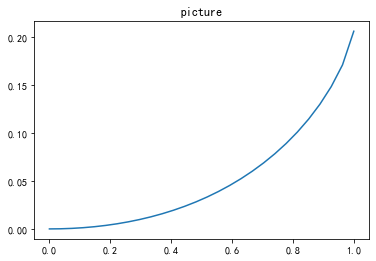

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
from scipy.integrate import odeint

#不动点迭代
xl = 0  #区间下限
xu = 0.11  #区间上限
x = (xl+xu)/2  #迭代初始值
x_list = [x]
i = 0
while True:
    x = x ** 3 - 0.165 * x ** 2 + 3.993 * 10 ** (-4) + x
    x_list.append(x)
    if len(x_list) > 1:
        i += 1
        error = abs((x_list[-1] - x_list[-2]) / x_list[-1])
        if error < 10**(-6):
            break
    else:
        pass

#欧拉法
def uler(n,x0,t0,tn,f):
    x = [x0]
    t = [t0]
    for i in range(n):
        dt = (tn-t0)/n
        tk = t[i]+dt
        t.append(tk)
        xk = x[i]+f(x[i])*dt
        x.append(xk)
    return x,t

a=np.arange(0,1,0.037)
yy=-5/8*(1-a)**0.8+5/12*(1-a)**1.2+5/24
plt.figure()
plt.plot(a, yy)
plt.title("picture")
plt.show()

### 知识点：
第七章 非线性方程求根  
第九章 常微分方程初值问题数值解法
### 思政感悟：
非线性方程可以对应很多格式的不动点迭代法，采取适当的不动点迭代法有助于提高算法的效率，选取合适的迭代方法非常重要。除了少数特殊类型的微分方程能用解析方法得到精确解外，多数情况找不到解的解析表达式。因此，只能采用数值方法来求解微分方程，选取合适的数值公式来求解微分方程也有助于提升常微分方程初边值问题的精确性和效率。
### 案例来源：
https://wenku.baidu.com/view/dd00bd62783e0912a2162a2a.html?_wkts_=1672055478196  
原问题采用仿真求解t，现问题采用不动点迭代求解t，增加求解导弹飞行轨迹。

# 有限元
## 问题描述
已知在区域Ω= [0, 1] × [0, 1]上，二维椭圆方程的Dirichlet边值问题如下定义:
$-∆u+2u=2(π^2+1)sin⁡(πx)sin⁡(πy),(x,y)∈Ω,u=0,(x,y)∈∂Ω$
其中真实解$u(x,y)=sin⁡(πx)sin⁡(πy)$。试完成以下题目:  
(1) 请写出上述问题的变分形式，以及相应有限元的离散变分形式;  
(2) 选取分片线形连续的有限元空间，依照(1)问中的变分形式计算上述问题的有限元解并与真实解比较. 你需要作出三张二维热力图(参考matplotlib中的imshow方法)，分别对应真实解，有限元解和绝对误差，以此来验证你的结果;  
(3) 理论上(2)中有限元解L2范数的收敛阶为$O(h2)$，试验证之.
## 解答
### 1.1 变分形式
考虑空间V：
$$V=H_0^1 (Ω)=\left\{v|∬_Ω[v^2+(∂v/∂x)^2+(∂v/∂y)^2 ]  dxdy<∞,v|_{∂Ω}=0\right\}$$
令
$$f(x,y)=2(π^2+1)sin⁡(πx)sin⁡(πy)$$
有
$$-∆u+2u=f$$
同时乘上v得，
$$-∆uv+2uv=fv$$
同时积分得，
$$∬_Ω-∆uv∙dxdy+∬_Ω2uv∙dxdy=∬_Ωfv∙dxdy$$
根据格林公式，
$$-∬_Ω∆uv∙dxdy=∬_Ω∇u∙∇v∙dxdy-∫_{∂Ω}\frac{∂u}{∂n} vds$$
由于在空间V中，
$$v|_{∂Ω}=0$$
式可以改写为，
$$∬_Ω∇u∙∇v∙dxdy+∬_Ω2uv∙dxdy=∬_Ωfv∙dxdy$$
问题转化为变分形式：
$$find \quad u∈V\quad s.t.$$
$$D(u,v)-F(v)=0,∀v∈V$$
其中，
$$D(u,v)=∬_Ω∇u∙∇v∙dxdy+∬_Ω2uv∙dxdy$$
$$F(v)=∬_Ωfv∙dxdy$$
### 1.2 有限元的离散变分形式
定义Vh为V的一个n维子空间，
$$V_h=\left\{v_h∈C(Ω ̅ ):v_h |_{e_i}=ax+by+c\right\}$$
求近似解，
$$find \quad u_h∈V_h s.t.$$
$$D(u_h,v_h )-F(v_h)=0,∀v_h∈V_h $$
任取一个单元
$$e_n=∆P_i P_j P_m$$
其中，
$$P_i=(x_i,y_i);P_j=(x_j,y_j);P_m=(x_m,y_m)$$
$$v=Nv_{e_n}$$
$$u=Nu_{e_n}$$
$$∇v=Bv_{e_n}$$
$$∇u=Bu_{e_n}$$
利用上式将积分式离散化，
$$∑_{e_n}∬_{e_n}(Bv_{e_n})^T∙Bu_{e_n}∙dxdy+∑_{e_n}∬_{e_n}2(Nv_{e_n})^T∙Nu_{e_n}∙dxdy=∑_{e_n}∬_{e_n}(Nv_{e_n})^T∙f∙dxdy$$
整理顺序，得到刚度矩阵的表达式：
$$v_{e_n}^T\left[∑_{e_n}∬_{e_n}(B)^T∙B∙dxdy+∑_{e_n}∬_{e_n}2(N)^T∙N∙dxdy\right] u_{e_n}={v_{e_n}}^T ∑_{e_n}∬_{e_n}(N)^T∙f∙dxdy$$
### 2.计算有限元解
对区域$Ω= [0, 1] × [0, 1]$，采用线性三角形单元，将区域Ω划分成$2N_x×N_y$的三角形单元。每个三角形单元由三个节点组成，每个节点有单元内的局部坐标和整体坐标，分别储存在points类和triangleelement类中。
#### 代码：

In [1]:
import numpy as np

In [2]:
Nx = 100
Ny = 100


class Points:
    x_space = np.linspace(0, 1, Nx + 1, endpoint=True)
    y_space = np.linspace(0, 1, Ny + 1, endpoint=True)
    yy, xx = np.meshgrid(y_space, x_space)
    xy = np.stack([xx, yy], axis=2)

    @staticmethod
    def get(i):
        return Points.xy[i[0], i[1]]

    @staticmethod
    def global_idx(i):
        return i[0] * (Nx + 1) + i[1]


#   只是存储点的全局指标，点的全局指标转换成坐标由Points全权负责

class TriangleElement:
    def __init__(self, i, j, k):
        self.i = i
        self.j = j
        self.k = k
    @property
    def p1(self):
        return Points.get(self.i)
    @property
    def p2(self):
        return Points.get(self.j)
    @property
    def p3(self):
        return Points.get(self.k)
    @property
    def area(self):
        # 既然是均匀网格，可以简单地
        # return 1 / Nx / Ny /2
        return (self.p2[0] * self.p3[1] - self.p2[1] * self.p3[0] +
                self.p3[0] * self.p1[1] - self.p3[1] * self.p1[0] +
                self.p1[0] * self.p2[1] - self.p1[1] * self.p2[0]) / 2
    
    def add_local_stiffness(self, global_stiffness: np.array):
        gi = Points.global_idx(self.i)
        gj = Points.global_idx(self.j)
        gk = Points.global_idx(self.k)
        sub_idx = [gi, gj, gk]
        i, j, k = Points.get(self.i), Points.get(self.j), Points.get(self.k)
        local_stiff = np.sum(np.array(
            [[(j - k) ** 2, (i - k) * (k - j), (i - j) * (j - k)],
             [(i - k) * (k - j), (i - k) ** 2, (k - i) * (i - j)],
             [(i - j) * (j - k), (k - i) * (i - j), (i - j) ** 2]]), axis=2) / self.area / 4
        global_stiffness[np.ix_(sub_idx, sub_idx)] += local_stiff
    
    def add_local_load(self, f: callable, global_load: np.array):
        gi = Points.global_idx(self.i)
        gj = Points.global_idx(self.j)
        gk = Points.global_idx(self.k)
        i, j, k = Points.get(self.i), Points.get(self.j), Points.get(self.k)

        def compose_fun(local_idx):
            if local_idx == 0:
                li, lj, lk = i, j, k
            if local_idx == 1:
                lk, li, lj = i, j, k
            if local_idx == 2:
                lj, lk, li = i, j, k

            def _fun(x, y):
                _r = (x * lj[1] - lj[0] * y + lj[0] * lk[1] + lk[0] * y - x * lk[1] - lk[0] * lj[1]) / 2 / self.area
                return _r * f(x, y)

            return _fun

        global_load[gi] += self.quadrature(compose_fun(0))
        global_load[gj] += self.quadrature(compose_fun(1))
        global_load[gk] += self.quadrature(compose_fun(2))
        return self.quadrature(compose_fun(0)), self.quadrature(compose_fun(1)), self.quadrature(compose_fun(2))
    def quadrature(self, q: callable):
        # return f((self.p1[0] + self.p2[0] + self.p3[0]) / 3, (self.p1[1] + self.p2[1] + self.p3[1]) / 3) * self.area
        return (q((self.p1[0] + self.p2[0]) / 2, (self.p1[1] + self.p2[1]) / 2) +
                q((self.p2[0] + self.p3[0]) / 2, (self.p2[1] + self.p3[1]) / 2) +
                q((self.p3[0] + self.p1[0]) / 2, (self.p3[1] + self.p1[1]) / 2)) / 3 * self.area

    def add_local_stiffness2(self, global_stiffness: np.array): #对u这一项的刚度进行计算
        gi = Points.global_idx(self.i)
        gj = Points.global_idx(self.j)
        gk = Points.global_idx(self.k)
        sub_idx = [gi, gj, gk]
        i, j, k = Points.get(self.i), Points.get(self.j), Points.get(self.k)

        def compose_fun2(local_idx1,local_idx2):
            if local_idx1 == 0:
                li, lj, lk = i, j, k
            if local_idx1 == 1:
                lk, li, lj = i, j, k
            if local_idx1 == 2:
                lj, lk, li = i, j, k

            if local_idx2 == 0:
                mi, mj, mk = i, j, k
            if local_idx2 == 1:
                mk, mi, mj = i, j, k
            if local_idx2 == 2:
                mj, mk, mi = i, j, k

            def _fun2(x, y):
                _r2= ((lj[1]-lk[1])*(mj[1]-mk[1])*x*x + (lj[1]-lk[1])*(mk[0]-mj[0])*x*y + (lj[1]-lk[1])*(mj[0]*mk[1]-mk[0]*mj[1])* x +
                      (lk[0]-lj[0])*(mj[1]-mk[1])*y*x + (lk[0]-lj[0])*(mk[0]-mj[0])*y*y + (lk[0]-lj[0])*(mj[0]*mk[1]-mk[0]*mj[1])* y +
                      (lj[0]*lk[1]-lk[0]*lj[1])*(mj[1]-mk[1])*x + (lj[0]*lk[1]-lk[0]*lj[1])*(mk[0]-mj[0])*y + (lj[0]*lk[1]-lk[0]*lj[1])*(mj[0]*mk[1]-mk[0]*mj[1]) )/ 4 / self.area / self.area
                return _r2 

            return _fun2
        
        for _i in range(0,3):
            for _j in range(0,3):
                
                local_stiff2 =  np.zeros((3, 3))
                
                local_stiff2[np.ix_([_i], [_j])] += self.quadrature(compose_fun2(_i,_j))

        
        def quadrature(self, q: callable):
        # return f((self.p1[0] + self.p2[0] + self.p3[0]) / 3, (self.p1[1] + self.p2[1] + self.p3[1]) / 3) * self.area
            return (q((self.p1[0] + self.p2[0]) / 2, (self.p1[1] + self.p2[1]) / 2) +
                q((self.p2[0] + self.p3[0]) / 2, (self.p2[1] + self.p3[1]) / 2) +
                q((self.p3[0] + self.p1[0]) / 2, (self.p3[1] + self.p1[1]) / 2)) / 3 * self.area

        

        global_stiffness[np.ix_(sub_idx, sub_idx)] += local_stiff2

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文
import math
pai=math.pi

In [4]:
def q(xx, yy):
    return 2 *(pai**2+1)*math.sin(pai*xx)*math.sin(pai*yy)

element_list = []
for ix in range(Nx):
    for iy in range(Ny):
        element_list.append(TriangleElement((ix, iy), (ix + 1, iy), (ix, iy + 1)))
        element_list.append(TriangleElement((ix, iy + 1), (ix + 1, iy), (ix + 1, iy + 1)))
global_stiffness = np.zeros(((Nx + 1) * (Ny + 1), (Nx + 1) * (Ny + 1)))

[[ 1.  -0.5  0.  ...  0.   0.   0. ]
 [-0.5  2.  -0.5 ...  0.   0.   0. ]
 [ 0.  -0.5  2.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  2.  -0.5  0. ]
 [ 0.   0.   0.  ... -0.5  2.  -0.5]
 [ 0.   0.   0.  ...  0.  -0.5  1. ]]
[[ 1.         -0.5         0.         ...  0.          0.
   0.        ]
 [-0.5         2.00000833 -0.5        ...  0.          0.
   0.        ]
 [ 0.         -0.5         2.00000833 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  2.00000833 -0.5
   0.        ]
 [ 0.          0.          0.         ... -0.5         2.00000833
  -0.5       ]
 [ 0.          0.          0.         ...  0.         -0.5
   1.00000833]]


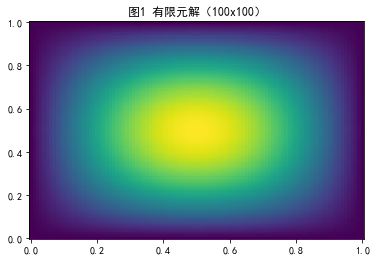

In [5]:
[te.add_local_stiffness(global_stiffness) for te in element_list]
print (global_stiffness)
[te.add_local_stiffness2(global_stiffness) for te in element_list]
print (global_stiffness)
interior_idx = (Nx + 1) * np.arange(1, Nx).reshape(Nx - 1, 1) + np.arange(1, Ny).reshape(1, Ny - 1)
interior_idx = interior_idx.ravel()
global_stiffness = global_stiffness[np.ix_(interior_idx, interior_idx)]
global_load = np.zeros((Nx + 1) * (Ny + 1))
[te.add_local_load(q, global_load) for te in element_list]
global_load = global_load[interior_idx]
res = np.linalg.solve(global_stiffness, global_load)
res = res.reshape(Nx - 1, Ny - 1)
res = np.pad(res, pad_width=1, mode='constant', constant_values=0)
plt.pcolormesh(Points.xx, Points.yy, res)
plt.title('图1 有限元解（100x100）')
plt.show()

In [6]:
res

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00107705, 0.00215314, ..., 0.0021544 , 0.00107778,
        0.        ],
       [0.        , 0.00215314, 0.00430427, ..., 0.00430655, 0.0021544 ,
        0.        ],
       ...,
       [0.        , 0.0021544 , 0.00430655, ..., 0.00430427, 0.00215314,
        0.        ],
       [0.        , 0.00107778, 0.0021544 , ..., 0.00215314, 0.00107705,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [7]:
x = np.linspace(0,1,Nx+1)
y = np.linspace(0,1,Ny+1)
I = np.zeros((Nx+1,Ny+1))
for ii in range(Nx+1):
    for jj in range(Ny+1):
        I[np.ix_([ii], [jj])] = math.sin(pai*x[ii])*math.sin(pai*y[jj])
I

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.86635786e-04, 1.97229788e-03, ...,
        1.97229788e-03, 9.86635786e-04, 3.84670856e-18],
       [0.00000000e+00, 1.97229788e-03, 3.94264934e-03, ...,
        3.94264934e-03, 1.97229788e-03, 7.68962088e-18],
       ...,
       [0.00000000e+00, 1.97229788e-03, 3.94264934e-03, ...,
        3.94264934e-03, 1.97229788e-03, 7.68962088e-18],
       [0.00000000e+00, 9.86635786e-04, 1.97229788e-03, ...,
        1.97229788e-03, 9.86635786e-04, 3.84670856e-18],
       [0.00000000e+00, 3.84670856e-18, 7.68962088e-18, ...,
        7.68962088e-18, 3.84670856e-18, 1.49975978e-32]])

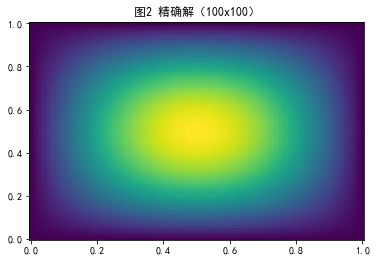

In [8]:
plt.pcolormesh(x, y, I)
plt.title('图2 精确解（100x100）')
plt.show()

In [9]:
tol = I - res
tol

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -9.04190489e-05, -1.80837809e-04, ...,
        -1.82102616e-04, -9.11407526e-05,  3.84670856e-18],
       [ 0.00000000e+00, -1.80837809e-04, -3.61620900e-04, ...,
        -3.63901772e-04, -1.82102616e-04,  7.68962088e-18],
       ...,
       [ 0.00000000e+00, -1.82102616e-04, -3.63901772e-04, ...,
        -3.61620900e-04, -1.80837809e-04,  7.68962088e-18],
       [ 0.00000000e+00, -9.11407526e-05, -1.82102616e-04, ...,
        -1.80837809e-04, -9.04190489e-05,  3.84670856e-18],
       [ 0.00000000e+00,  3.84670856e-18,  7.68962088e-18, ...,
         7.68962088e-18,  3.84670856e-18,  1.49975978e-32]])

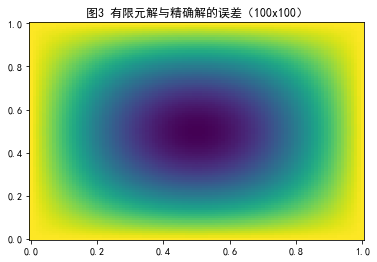

In [10]:
plt.pcolormesh(x, y, tol)
plt.title('图3 有限元解与精确解的误差（100x100）')
plt.show()

### 3.验证收敛阶
采用不同尺寸的网格计算，可以得到误差函数随网格尺寸h的变化关系，如分别采用$$(Δx,Δt), 1/2 (Δx,Δt), 1/4 (Δx,Δt)的步长进行计算，得到R(∆x), R(1/2 ∆x), R(1/4 ∆x)$$
由于，
$$R(∆x)=E(∆x)+O({∆x}^{p+1})≈C∙{∆x}^p$$
那么，
$$\frac{R(∆x)}{R(\frac{1}{2}{∆x})} =\frac{C∙{∆x}^p}{C∙{(\frac{∆x}{2})}^p}$$
因此收敛精度p可以采用下式进行估计
$$p=\frac{log\left(R(∆x)⁄R(\frac{1}{2}{∆x})\right)}{log2}$$
计算所得的误差L2范数列为表1， 

| 单元划分 | L2范数 | 收敛阶 |
| :------: | :---------: | :---------: |
| 2 | 0.0908 | 1.8492 |
| 4 | 0.0252 | 1.9549 |
| 8 | 0.0065 | 2.0223 |
| 16 | 0.0016 | 1.9707 |
| 32 | 4.0821e-04 | 1.9993 |
| 64 | 1.0210e-04 | - |


因此，(2)中有限元解L2范数的收敛阶为$O(h^2)$。